<h2 align='center' style='color:green'>Exercise: Outlier removal using standard deviation and z score<h2>

In [8]:
import pandas as pd
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14,10)

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/Exercise/bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


**We will quickly examine price_per_sqft column to check min,max,mean and percentile values**


In [10]:
df.price_per_sqft.describe()


count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

**Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score**

**Also plot histogram to see how is the data distribution**

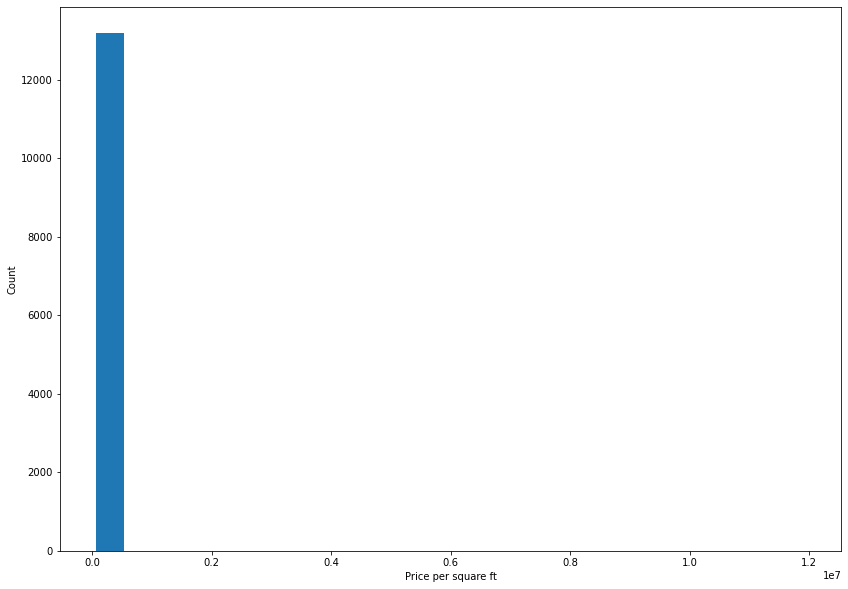

In [15]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

**Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar**

Using **log scale** can make visualization little better

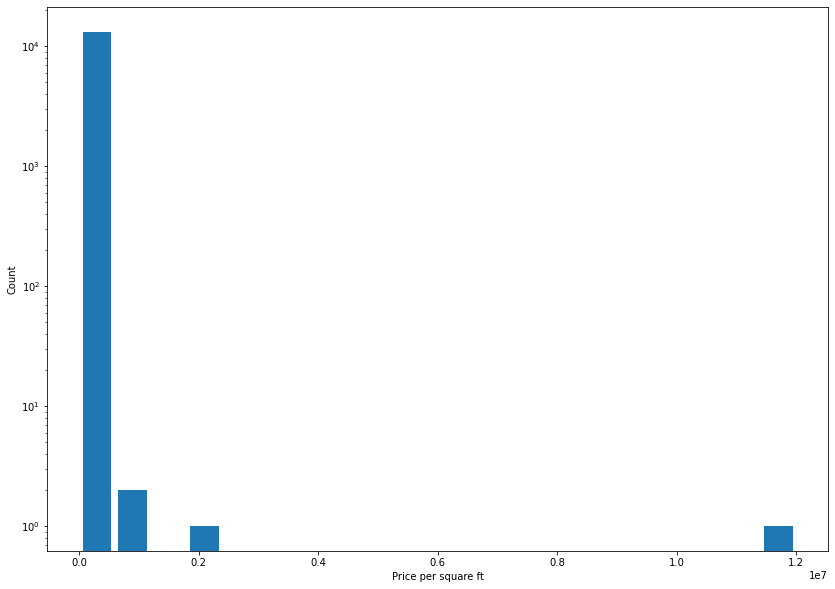

In [16]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

You see atleast few bars on right hand side of our highest building at least :)



1. **Treat outliers using percentile first**


In [17]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [18]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150
12355,other,4 BHK,16335.0,4.0,149.0,4,912
5343,other,9 BHK,42000.0,8.0,175.0,9,416
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
7575,other,1 BHK,425.0,1.0,750.0,1,176470
11635,Begur,3 BHK,2400.0,3.0,12.0,3,500
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250


In [19]:
outliers.shape

(28, 7)

Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [20]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [21]:
df.shape


(13200, 7)

We removed total **28** outliers

**(2) Now remove outliers using 3 standard deviation**


In [22]:
max_limit = df2.price_per_sqft.mean() + 3*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 3*df2.price_per_sqft.std()
max_limit, min_limit

(19086.715835719682, -5759.408365327943)

In [23]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
8483,HSR Layout,8 Bedroom,800.0,8.0,285.0,8,35625
4325,Cunningham Road,3 BHK,3815.0,3.0,763.0,3,20000
5144,Rajaji Nagar,3 Bedroom,2790.0,3.0,950.0,3,34050
3136,other,4 Bedroom,1200.0,4.0,350.0,4,29166
5887,other,6 Bedroom,4000.0,6.0,850.0,6,21250
9704,Hennur Road,4 Bedroom,2400.0,5.0,500.0,4,20833
69,other,3 Bedroom,500.0,3.0,100.0,3,20000
9077,other,5 Bedroom,1200.0,5.0,260.0,5,21666
3825,other,4 Bedroom,2400.0,4.0,500.0,4,20833
10327,Cunningham Road,4 Bedroom,7500.0,6.0,1800.0,4,24000


In [24]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(12874, 7)

In [25]:
df2.shape[0]-df3.shape[0]


298

In this step we removed total 298 outliers



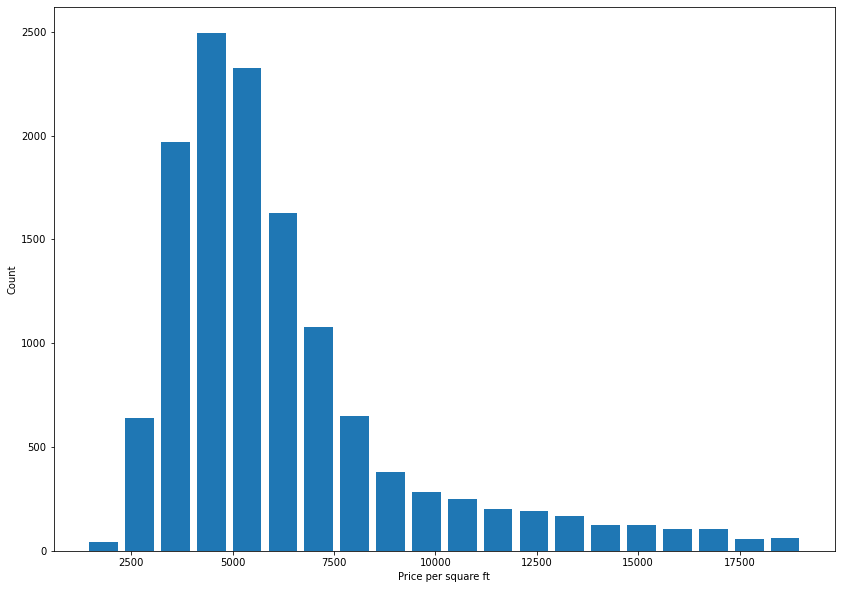

In [26]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

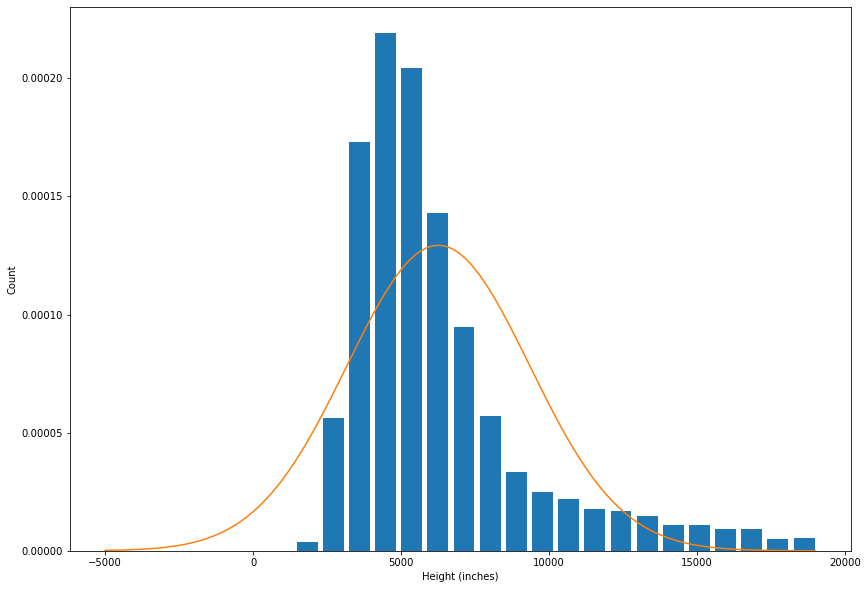

In [29]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

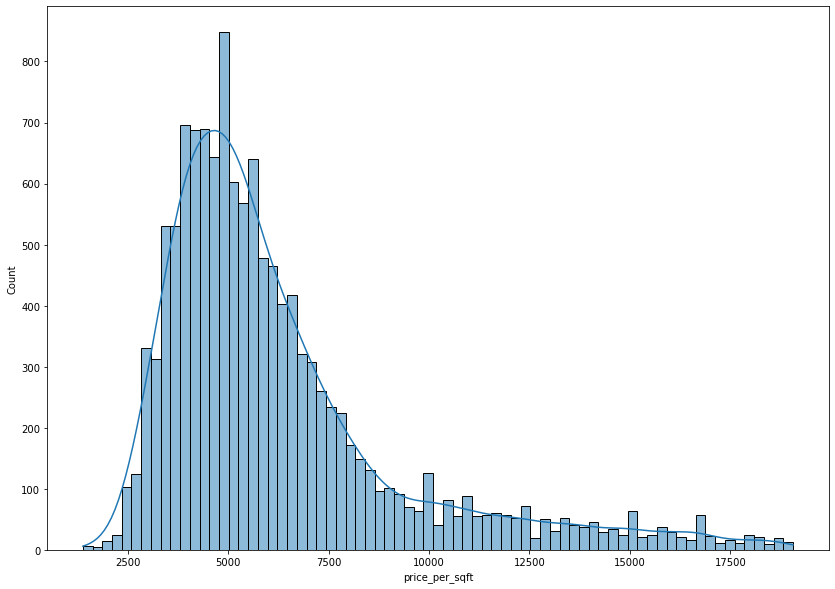

In [27]:
sns.histplot(df3['price_per_sqft'], kde=True)

**(3) Now remove outliers using z score. Use z score of 3 as your thresold**


In [30]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\shhimel\AppData\Local\Temp\ipykernel_19300\722868599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
10702,other,4 Bedroom,1350.0,4.0,175.0,4,12962,1.520965
6144,other,4 Bedroom,3400.0,4.0,190.0,4,5588,-0.259756
12983,Ramagondanahalli,3 BHK,1910.0,3.0,131.0,3,6858,0.046932
9424,Whitefield,4 Bedroom,2000.0,4.0,312.0,4,15600,2.158006
6964,Sahakara Nagar,2 Bedroom,1200.0,2.0,136.0,2,11333,1.127583
316,other,2 BHK,1113.0,2.0,51.0,2,4582,-0.502691
8478,Bannerghatta Road,1 BHK,630.0,1.0,35.0,1,5555,-0.267725
11023,other,3 BHK,1410.0,2.0,54.0,3,3829,-0.684530
5205,other,2 BHK,1080.0,2.0,62.0,2,5740,-0.223050
12874,Judicial Layout,5 BHK,1100.0,4.0,199.0,5,18090,2.759307


In [32]:
outliers_z = df2[(df2.zscore < -3) | (df2.zscore>3)]
outliers_z.shape

(298, 8)

In [33]:
outliers_z.sample(5)


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
6963,other,2 BHK,1150.0,2.0,250.0,2,21739,3.640490
7561,KR Puram,8 Bedroom,1500.0,7.0,382.0,8,25466,4.540510
6766,Rajaji Nagar,5 BHK,7500.0,8.0,1700.0,5,22666,3.864348
11192,Banashankari Stage V,3 Bedroom,1200.0,4.0,240.0,3,20000,3.220546
7262,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994


In [36]:
df4 = df2[(df2.zscore>-3)&(df2.zscore<3)]
df4.shape

(12874, 8)

In [37]:
df2.shape[0] - df4.shape[0]


298

In this step also we removed 298 outliers. The result would be exactly same as 3 standard deviation